In [19]:
import yfinance as yf
import pandas as pd

# Define the tickers
tickers = {
    'MOEX': 'IMOEX.ME',  # RTS Index
    'OIL': 'CL=F',    # Crude Oil Futures
    'GAS': 'NG=F',    # Natural Gas Futures
    'RUB_USD': 'RUB=X'  # RUB/USD Exchange Rate
}

# Define the time period
start_date = '2022-01-01'
end_date = '2023-12-31'

# Fetch the data
data = {}
for name, ticker in tickers.items():
    data[name] = yf.download(ticker, start=start_date, end=end_date)

# Save data to CSV (optional)
for name, df in data.items():
    df.to_csv(f"{name}_data.csv")

# Check one of the dataframes
print(data['MOEX'].head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-03  3825.300049  3866.149902  3823.500000  3852.500000  3852.500000   
2022-01-04  3880.199951  3892.330078  3846.810059  3873.489990  3873.489990   
2022-01-05  3857.899902  3875.250000  3805.060059  3815.050049  3815.050049   
2022-01-06  3758.679932  3784.169922  3720.169922  3753.290039  3753.290039   
2022-01-10  3798.429932  3806.840088  3726.729980  3738.679932  3738.679932   

            Volume  
Date                
2022-01-03       0  
2022-01-04       0  
2022-01-05       0  
2022-01-06       0  
2022-01-10       0  


In [20]:
# Function to preprocess data
def preprocess_data(data):
    for name, df in data.items():
        # Fill missing values with the last available value
        df.fillna(method='ffill', inplace=True)
        # Normalize the data using the first value
        df['Adj Close'] = df['Adj Close'] / df['Adj Close'].iloc[0]
    return data

# Apply preprocessing
preprocessed_data = preprocess_data(data)

# Check the preprocessed data
preprocessed_data['MOEX'].head(50)


C:\Users\mohit\AppData\Local\Temp\ipykernel_9872\2784625147.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,3825.300049,3866.149902,3823.500000,3852.500000,1.000000,0
2022-01-04,3880.199951,3892.330078,3846.810059,3873.489990,1.005448,0
2022-01-05,3857.899902,3875.250000,3805.060059,3815.050049,0.990279,0
2022-01-06,3758.679932,3784.169922,3720.169922,3753.290039,0.974248,0
2022-01-10,3798.429932,3806.840088,3726.729980,3738.679932,0.970456,0
2022-01-11,3764.560059,3800.909912,3751.449951,3785.290039,0.982554,0
2022-01-12,3797.310059,3841.719971,3783.919922,3829.949951,0.994147,0
2022-01-13,3814.979980,3818.969971,3664.479980,3674.729980,0.953856,0
2022-01-14,3703.899902,3723.620117,3512.030029,3596.979980,0.933674,0


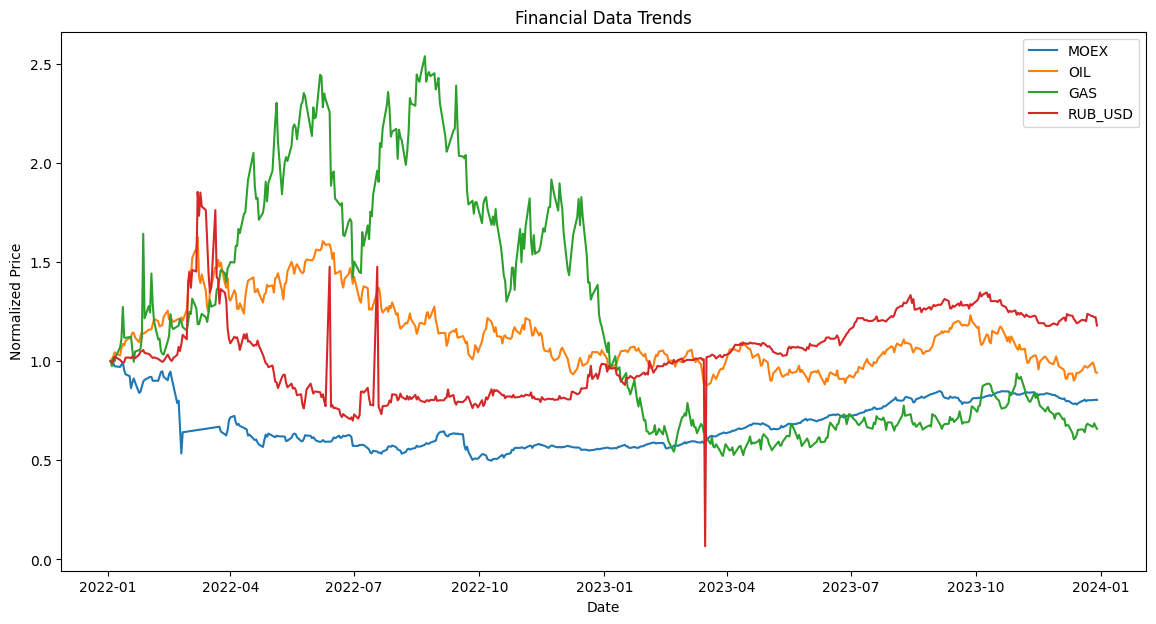

In [21]:
import matplotlib.pyplot as plt

# Function to plot data
def plot_data(data):
    plt.figure(figsize=(14, 7))
    for name, df in data.items():
        plt.plot(df.index, df['Adj Close'], label=name)
    plt.title('Financial Data Trends')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.show()

# Plot the data
plot_data(preprocessed_data)


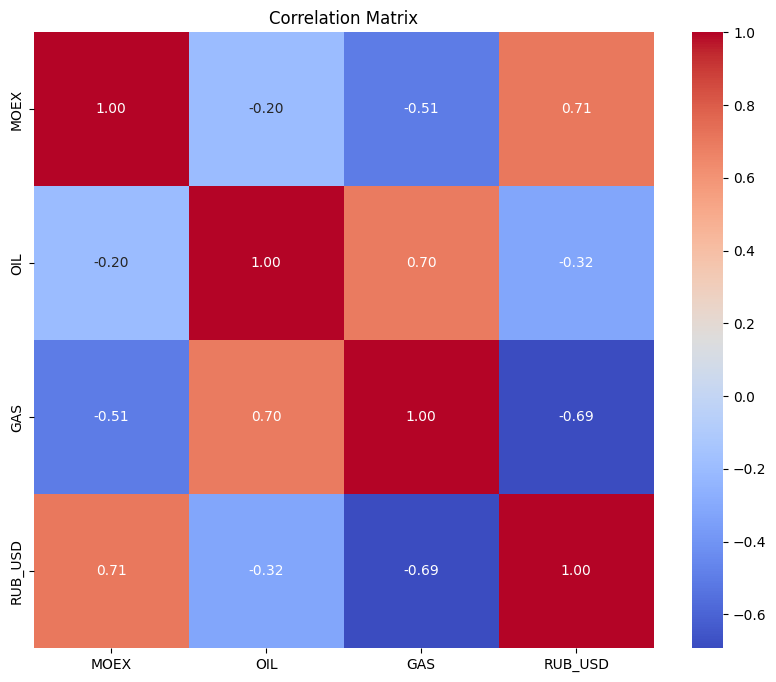

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze correlations
def analyze_correlations(data):
    # Create a dataframe for closing prices
    prices = pd.DataFrame()
    for name, df in data.items():
        prices[name] = df['Adj Close']

    # Calculate correlations
    correlations = prices.corr()

    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

analyze_correlations(data)


In [23]:
# Feature engineering
def add_lagged_features(data, lags=3):
    for name, df in data.items():
        for lag in range(1, lags + 1):
            df[f'lag_{lag}'] = df['Adj Close'].shift(lag)
    return data

# Apply feature engineering
feature_engineered_data = add_lagged_features(data)

# Show example data
print(feature_engineered_data['MOEX'].head())


                   Open         High          Low        Close  Adj Close  \
Date                                                                        
2022-01-03  3825.300049  3866.149902  3823.500000  3852.500000   1.000000   
2022-01-04  3880.199951  3892.330078  3846.810059  3873.489990   1.005448   
2022-01-05  3857.899902  3875.250000  3805.060059  3815.050049   0.990279   
2022-01-06  3758.679932  3784.169922  3720.169922  3753.290039   0.974248   
2022-01-10  3798.429932  3806.840088  3726.729980  3738.679932   0.970456   

            Volume     lag_1     lag_2     lag_3  
Date                                              
2022-01-03       0       NaN       NaN       NaN  
2022-01-04       0  1.000000       NaN       NaN  
2022-01-05       0  1.005448  1.000000       NaN  
2022-01-06       0  0.990279  1.005448  1.000000  
2022-01-10       0  0.974248  0.990279  1.005448  


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
def prepare_model_data(data):
    df = data['MOEX'].dropna()  # Use MOEX as an example
    X = df[[col for col in df.columns if col.startswith('lag_')]]
    y = df['Adj Close']
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = prepare_model_data(feature_engineered_data)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0008846787978339008


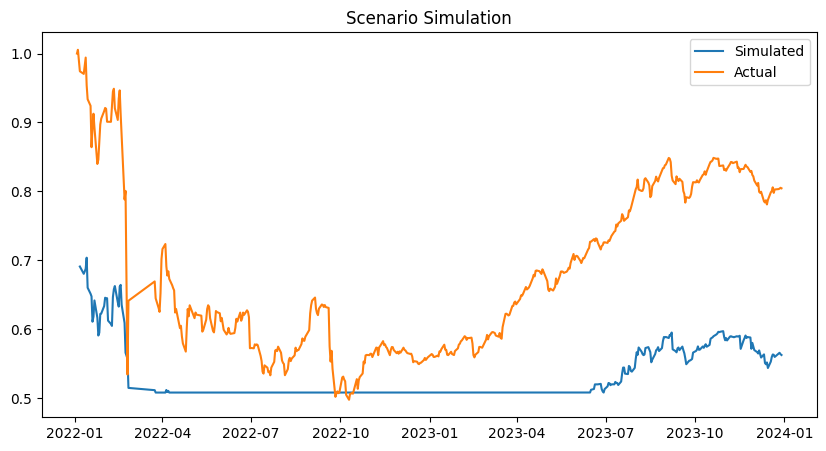

In [48]:
def simulate_impact(data, model, impact_factor):
    # Copy the dataset to modify it for simulation
    future_data = data['MOEX'].copy()
    
    # Adjust the 'Adj Close' by the impact factor
    future_data['Adj Close'] *= impact_factor
    
    # Update lagged features based on the adjusted 'Adj Close'
    for lag in range(1, 4):  # Assuming we have 3 lags as in your original setup
        future_data[f'lag_{lag}'] = future_data['Adj Close'].shift(lag)
    
    # Ensure there are no NaNs which might have been introduced by shifting
    future_data.dropna(inplace=True)
    
    # Prepare features for prediction
    future_features = future_data[[f'lag_{i}' for i in range(1, 4)]]
    
    # Predict using the updated features
    simulated_predictions = model.predict(future_features)
    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(future_data.index, simulated_predictions, label='Simulated')
    plt.plot(data['MOEX'].index, data['MOEX']['Adj Close'], label='Actual')
    plt.title('Scenario Simulation')
    plt.legend()
    plt.show()

# Example of using the function
simulate_impact(data, model, 0.7)
